# Exploratory Data Analysis

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os

In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [5]:
from pycaret.regression import *

In [6]:
def plot_distribution(dataset):
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(20,30))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    
    rows = math.ceil(float(dataset.shape[1]) / 3)
    
    for i, column in enumerate(dataset.columns):
        
        ax = fig.add_subplot(rows, 3, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:
            
            if(len(dataset[column].unique()) > 10):
               
                most_frequent = dataset[column].value_counts().sort_values(ascending=False)[:10].index.tolist()
                g = sns.countplot(y=column, data=dataset[dataset[column].isin(most_frequent)])
                ax.set_title(column + " (10 out of " + str(len(dataset[column].unique())) + " most frequent values)")
            else:
                g = sns.countplot(y=column, data=dataset)
            
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

### Loading the data into the data frame.

In [7]:
# utf-8 encoding:
# df = pd.read_csv("input/nano_dataset.txt", sep="\t", encoding="utf-8")

df = pd.read_csv("input/nano_dataset.txt", sep="\t", encoding="unicode_escape")

### Replace '?' with null values and keep rows where Viability is not null

In [8]:
df = df.replace('?', np.nan)
df = df[df['Viability'].notna()]

### Replace floating-point comma with dot and make sure numerical columns have numeric data type

In [9]:
df["core_size_nm"] = df["core_size_nm"].str.replace(',','.')
df["core_size_nm"] = pd.to_numeric(df["core_size_nm"])

df["hydro_size_nm"] = df["hydro_size_nm"].str.replace(',','.')
df["hydro_size_nm"] = pd.to_numeric(df["hydro_size_nm"])

df["Surf_charge_mV"] = df["Surf_charge_mV"].str.replace(',','.')
df["Surf_charge_mV"] = pd.to_numeric(df["Surf_charge_mV"])

df["Surface_area_m2_g"] = df["Surface_area_m2_g"].str.replace(',','.')
df["Surface_area_m2_g"] = pd.to_numeric(df["Surface_area_m2_g"])

df["Dose_microg_mL"] = df["Dose_microg_mL"].str.replace(',','.')
df["Dose_microg_mL"] = pd.to_numeric(df["Dose_microg_mL"])

df["Viability"] = df["Viability"].str.replace(',','.')
df["Viability"] = pd.to_numeric(df["Viability"])

print("Duration_h: " + str(pd.api.types.is_numeric_dtype(df['Duration_h'])))
print("core_size_nm: " + str(pd.api.types.is_numeric_dtype(df['core_size_nm'])))
print("hydro_size_nm: " + str(pd.api.types.is_numeric_dtype(df['hydro_size_nm'])))
print("Surf_charge_mV: " + str(pd.api.types.is_numeric_dtype(df['Surf_charge_mV'])))
print("Surface_area_m2_g: " + str(pd.api.types.is_numeric_dtype(df['Surface_area_m2_g'])))
print("Dose_microg_mL: " + str(pd.api.types.is_numeric_dtype(df['Dose_microg_mL'])))
print("Viability: " + str(pd.api.types.is_numeric_dtype(df['Viability'])))

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Viability: True


### Cheack shape, head, tail and a sample of the dataframe

In [10]:
df.shape

(11591, 19)

In [11]:
df.head(n=5)

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,Viability
0,Au,None,39.0,NaN,NaN,NaN,Rod,0.3,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,84.99
1,Au,None,39.0,NaN,NaN,NaN,Rod,0.6,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,86.85
2,Au,None,39.0,NaN,NaN,NaN,Rod,1.2,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,85.48
3,Au,None,39.0,NaN,NaN,NaN,Rod,2.5,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,70.72
4,Au,None,39.0,NaN,NaN,NaN,Rod,5.0,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,54.09


### Check data types

In [12]:
df.dtypes

NP_type               object
Coating               object
core_size_nm         float64
hydro_size_nm        float64
Surf_charge_mV       float64
Surface_area_m2_g    float64
shape                 object
Dose_microg_mL       float64
Duration_h           float64
Cell_name             object
Cell_species          object
cell_Organ            object
Cell_morphology       object
Cell_age              object
cell_type             object
sex                   object
Assay                 object
Test_indicator        object
Viability            float64
dtype: object

### Describe dataframe

#### Describe numerical columns

In [13]:
df.describe()

,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,Viability
count,10784.000000,2834.000000,5377.000000,850.000000,11369.000000,11255.000000,11591.000000
mean,55.983907,321.677421,-6.299405,100.796365,88.920945,34.044958,72.769054
std,93.620772,307.192574,28.965272,103.692893,527.034851,34.059479,32.557049
min,0.840000,8.700000,-158.000000,7.000000,0.000000,0.000000,-58.900000
25%,6.000000,120.000000,-26.960000,22.000000,0.010000,24.000000,51.290000
50%,21.000000,239.000000,-11.000000,57.000000,1.311929,24.000000,83.240000
75%,60.000000,404.000000,12.100000,177.570000,50.000000,48.000000,96.970000
max,900.000000,2029.000000,256.000000,576.230000,15000.000000,672.000000,404.810000


#### Describe categorical columns

In [14]:
df.describe(include=["bool", "object"])

,NP_type,Coating,shape,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator
count,11591,11591,4532,11591,11591,11591,11571,10818,11489,8508,11591,11342
unique,79,151,13,285,22,65,37,5,2,2,35,17
top,CdSe,None,Sphere,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt
freq,1727,7881,3300,949,9003,2008,5821,7925,7066,5053,5066,7590


### Count missing values

In [15]:
print(df.isnull().sum())

NP_type                  0
Coating                  0
core_size_nm           807
hydro_size_nm         8757
Surf_charge_mV        6214
Surface_area_m2_g    10741
shape                 7059
Dose_microg_mL         222
Duration_h             336
Cell_name                0
Cell_species             0
cell_Organ               0
Cell_morphology         20
Cell_age               773
cell_type              102
sex                   3083
Assay                    0
Test_indicator         249
Viability                0
dtype: int64


### Remove outliers

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

core_size_nm          54.00
hydro_size_nm        284.00
Surf_charge_mV        39.06
Surface_area_m2_g    155.57
Dose_microg_mL        49.99
Duration_h            24.00
Viability             45.68
dtype: float64


In [17]:
data_df = df[~((df.Viability < (Q1.Viability - 1.5 * IQR.Viability)) | (df.Viability > (Q3.Viability + 1.5 * IQR.Viability)))]

In [18]:
data_df.shape

(11572, 19)

### Remove duplicate rows

In [19]:
data_df = data_df.drop_duplicates()

In [20]:
data_df.shape

(11404, 19)

### Remove rows with Viability outside the range [0,150]

In [21]:
data_df = data_df[(data_df['Viability'] >= 0) & (data_df['Viability'] <= 150)]
print(data_df.shape)

(11376, 19)


### Plot features (categorical and numerical)

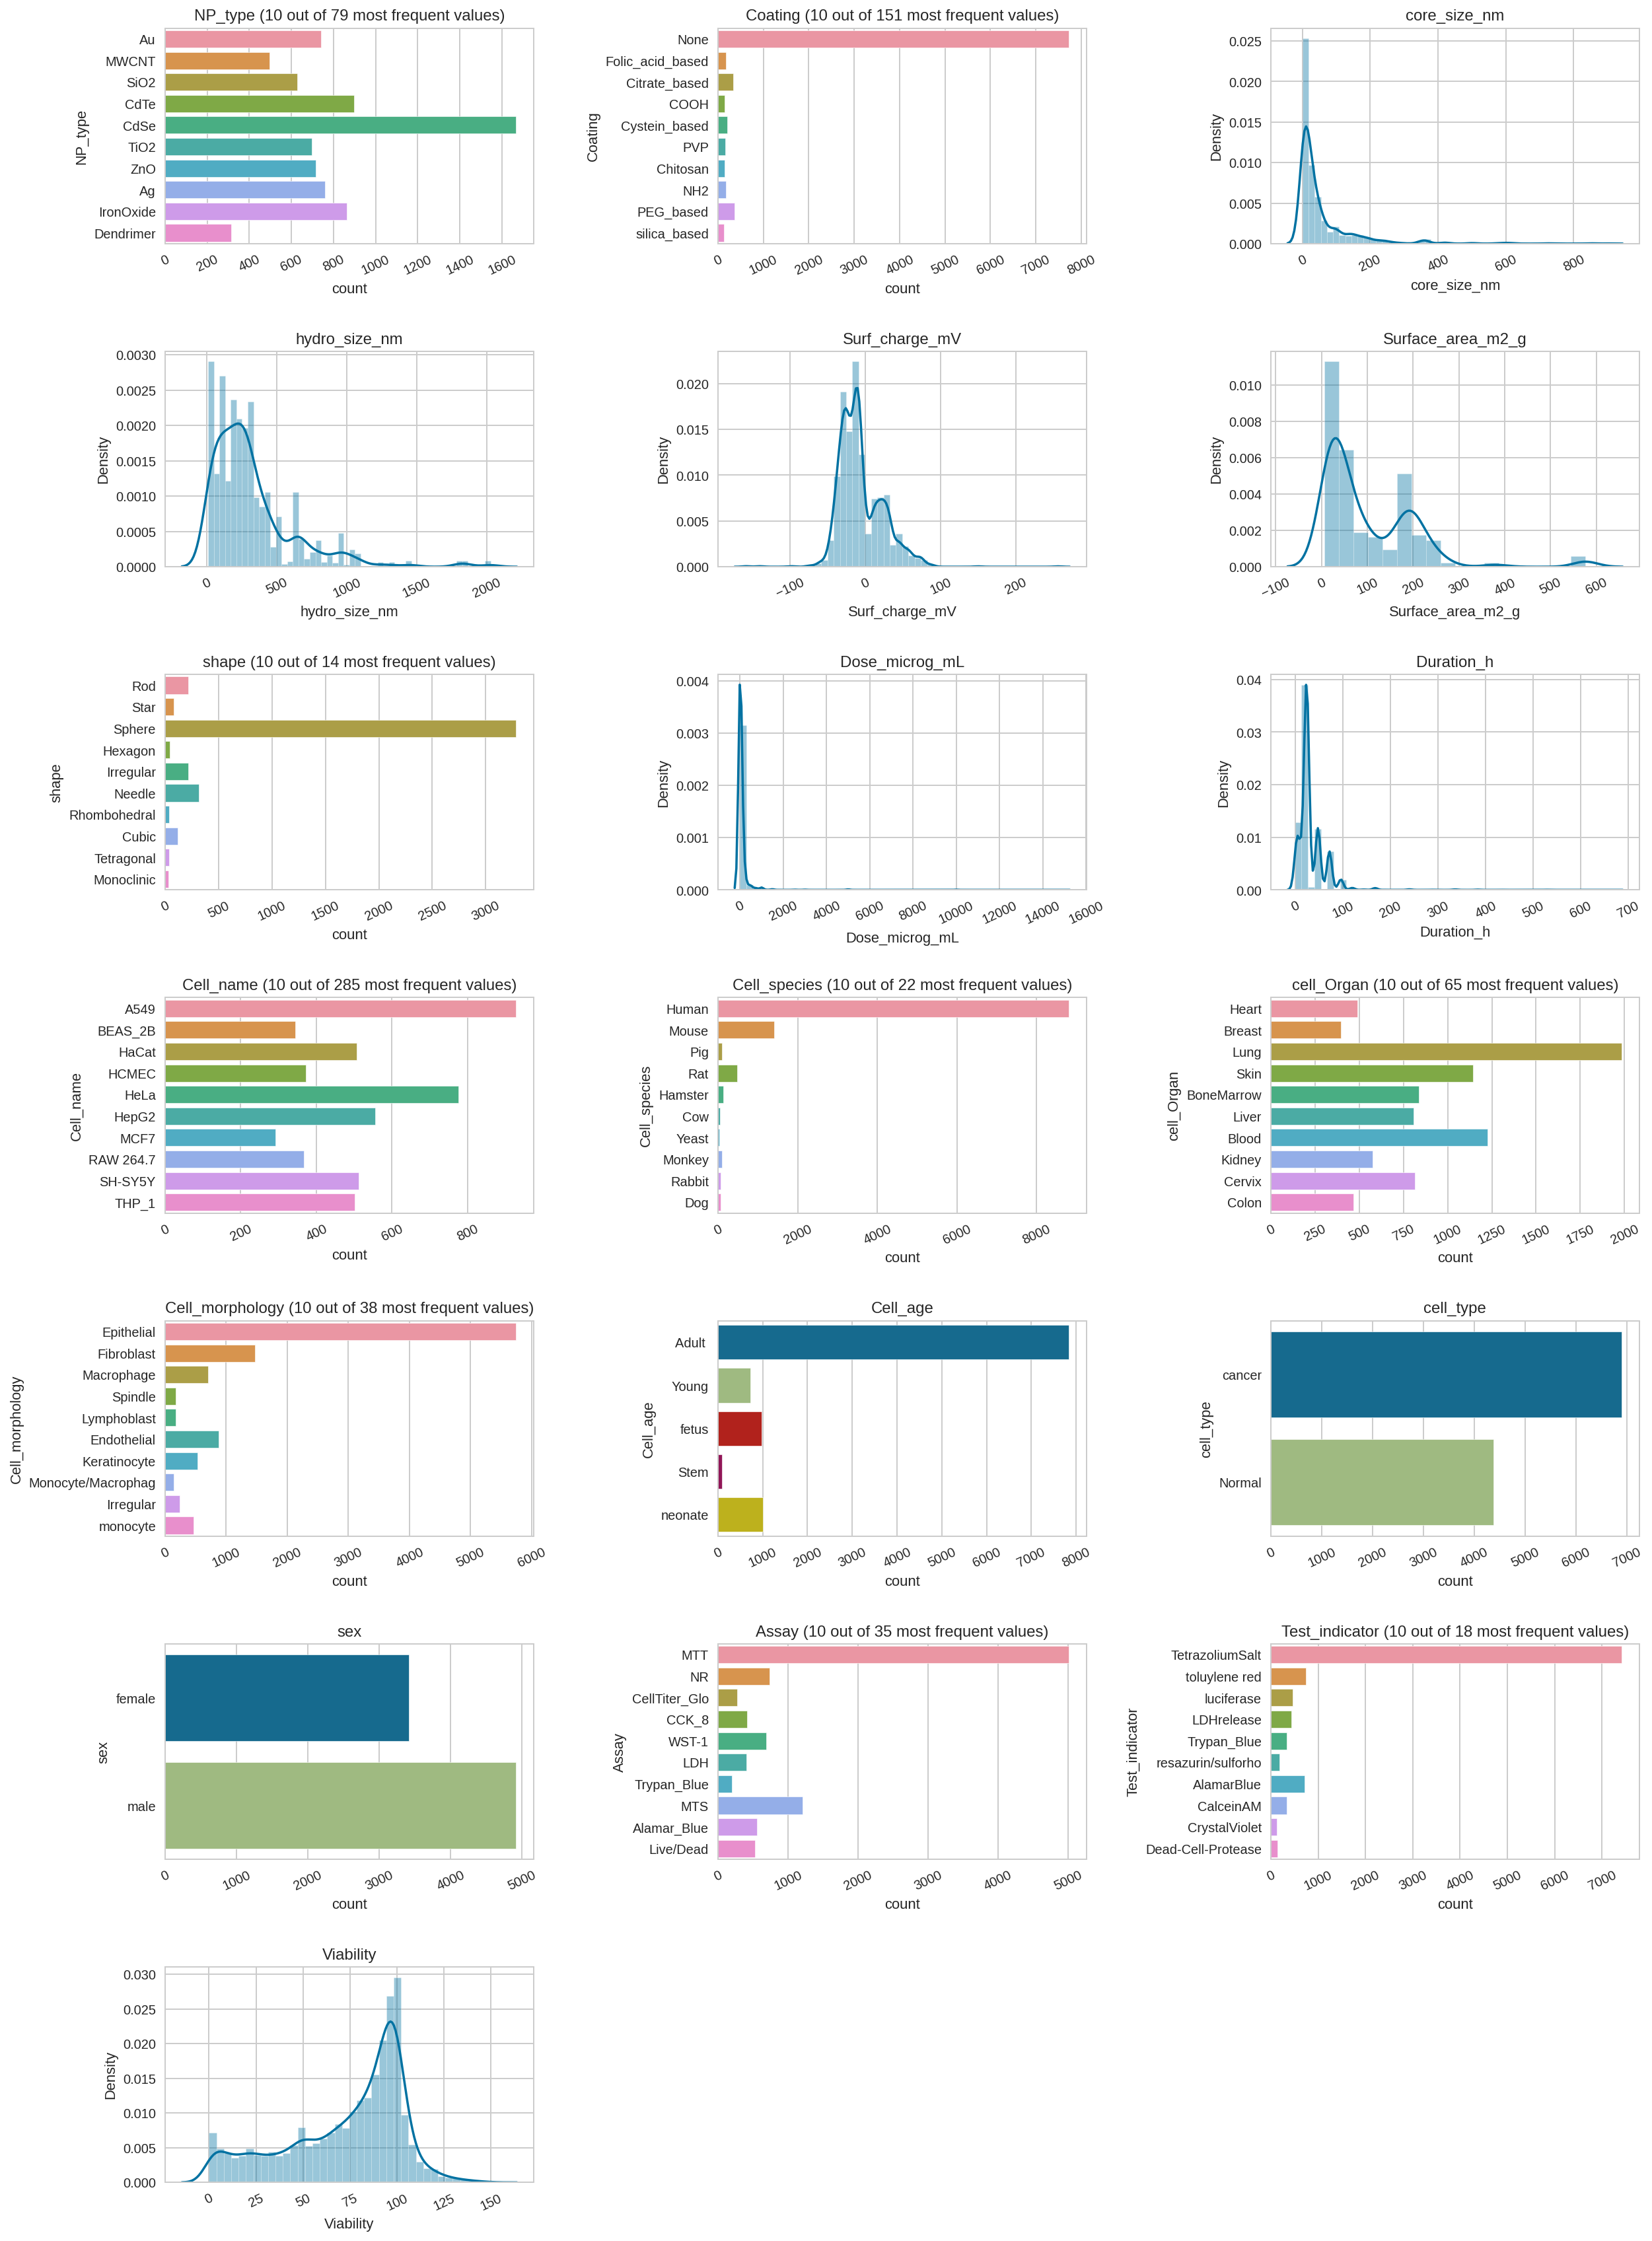

In [22]:
plot_distribution(data_df)

## Group NP types

In [23]:
data_df["nanomaterial"] = data_df["NP_type"]

In [24]:
metal_oxides = ["SiO2", "MgO", "TiO2", "ZnO", "Bi2O3", "Cu2O", "Fe3O4", "IronOxide", "MnO", "ZrO2", "Co3O4", "CoO", "Cr2O3", 
          "Mn2O3", "Ni2O3", "Al2O3", "Fe2O3", "In2O3", "La2O3", "NiO", "Sb2O3", "SnO2", "Y2O3", "CeO2", "CdO", "Dy2O3", 
          "Er2O3", "Eu2O3", "Gd2O3", "HfO2", "MnO2", "Nd2O3", "Sm2O3", "Yb2O3"]
carbon = ["Graphite", "Diamond", "C60", "C70", "Carbon"]
nanotubes = ["Nanotubes", "SWCNT", "MWCNT"]

In [25]:
data_df.loc[data_df["NP_type"].isin(metal_oxides), "nanomaterial"] = "meta_oxide" 

In [26]:
data_df.loc[data_df["NP_type"].isin(carbon), "nanomaterial"] = "carbon" 

In [27]:
data_df.loc[data_df["NP_type"].isin(nanotubes), "nanomaterial"] = "nanotubes" 

In [28]:
data_df.sample(n=20)

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,Viability,nanomaterial
1239,CdSe,None,5.000,NaN,NaN,NaN,NaN,2.000000e-02,240.0,ABMCs,Pig,BoneMarrow,Stem-cell,Stem,NaN,NaN,MTT,TetrazoliumSalt,89.00,CdSe
5969,MnO,None,10.000,NaN,NaN,NaN,NaN,2.952885e-02,24.0,HMEC­1,Human,Skin,Endothelial,neonate,Normal,male,ATPLite,luciferase,43.76,meta_oxide
180,TiO2,None,124.900,171.0,-17.60,NaN,NaN,3.078320e-07,6.0,A431,Human,Skin,Epithelial,Adult,cancer,female,MTT,TetrazoliumSalt,97.14,meta_oxide
7872,NiO,None,22.000,NaN,NaN,NaN,Sphere,1.000000e+01,24.0,MCF7,Human,Breast,Epithelial,Adult,cancer,female,NR,toluylene red,44.67,meta_oxide
1018,TiO2,None,25.000,434.1,-7.83,NaN,Sphere,1.000000e+02,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,84.34,meta_oxide
3646,Al2O3,None,39.700,NaN,36.30,NaN,Sphere,1.000000e+02,24.0,HCMEC,Human,Heart,Endothelial,Adult,Normal,NaN,MTT,TetrazoliumSalt,82.30,meta_oxide
1824,TiO2,None,20.000,707.0,-12.10,50.4,NaN,0.000000e+00,24.0,BEAS_2B,Human,Lung,Epithelial,Adult,Normal,NaN,MTS,TetrazoliumSalt,100.00,meta_oxide
9297,CdTe,None,5.300,NaN,NaN,NaN,NaN,2.000000e-02,12.0,Raji,Human,Lymph,Lymphocyte,Adult,cancer,male,MTT,TetrazoliumSalt,85.00,CdTe
7122,Ag,PVP,27.020,NaN,-18.40,NaN,Sphere,1.350000e+00,24.0,KEC,Human,Skin,Epithelial,Adult,Normal,NaN,MTS,TetrazoliumSalt,102.89,Ag
3980,ZrO2,None,10.000,NaN,-45.50,NaN,Sphere,2.000000e+02,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,43.60,meta_oxide


# PyCaret

In [42]:
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

## Define data preparing scenarios

In [29]:
imputation_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["imputation_type"] = "simple"
scenario1["numeric_imputation"] = "median"

scenario2 = {}
scenario2["ID"] = 2
scenario2["imputation_type"] = "simple"
scenario2["numeric_imputation"] = "mean"

scenario3 = {}
scenario3["ID"] = 3
scenario3["imputation_type"] = "iterative"
scenario3["numeric_imputation"] = "mean"

imputation_scenarios.append(scenario1)
imputation_scenarios.append(scenario2)
imputation_scenarios.append(scenario3)



features_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario1["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario1["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario2 = {}
scenario2["ID"] = 2
scenario2["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario2["high_cardinality_features"] = None
scenario2["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario3 = {}
scenario3["ID"] = 3
scenario3["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario3["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario3["bin_numeric_features"] = None

scenario4 = {}
scenario4["ID"] = 4
scenario4["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario4["high_cardinality_features"] = None
scenario4["bin_numeric_features"] = None

scenario5 = {}
scenario5["ID"] = 5
scenario5["ignore_features"] = ["nanomaterial", "Coating", "Cell_name"]
scenario5["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario5["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario6 = {}
scenario6["ID"] = 6
scenario6["ignore_features"] = ["nanomaterial", "Coating", "Cell_name"]
scenario6["high_cardinality_features"] = None
scenario6["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario7 = {}
scenario7["ID"] = 7
scenario7["ignore_features"] = ["nanomaterial", "Coating", "Cell_name"]
scenario7["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario7["bin_numeric_features"] = None

scenario8 = {}
scenario8["ID"] = 8
scenario8["ignore_features"] = ["nanomaterial", "Coating", "Cell_name"]
scenario8["high_cardinality_features"] = None
scenario8["bin_numeric_features"] = None

features_scenarios.append(scenario1)
features_scenarios.append(scenario2)
features_scenarios.append(scenario3)
features_scenarios.append(scenario4)
features_scenarios.append(scenario5)
features_scenarios.append(scenario6)
features_scenarios.append(scenario7)
features_scenarios.append(scenario8)



preprocess_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["normalize"] = True
scenario1["remove_outliers"] = True

scenario2 = {}
scenario2["ID"] = 2
scenario2["normalize"] = True
scenario2["remove_outliers"] = False

scenario3 = {}
scenario3["ID"] = 3
scenario3["normalize"] = False
scenario3["remove_outliers"] = True

scenario4 = {}
scenario4["ID"] = 4
scenario4["normalize"] = False
scenario4["remove_outliers"] = False

preprocess_scenarios.append(scenario1)
preprocess_scenarios.append(scenario2)
preprocess_scenarios.append(scenario3)
preprocess_scenarios.append(scenario4)




derived_features_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["feature_interaction"] = False
scenario1["feature_ratio"] = False
scenario1["polynomial_features"] = False
scenario1["trigonometry_features"] = False

scenario2 = {}
scenario2["ID"] = 2
scenario2["feature_interaction"] = True
scenario2["feature_ratio"] = True
scenario2["polynomial_features"] = True
scenario2["trigonometry_features"] = True


derived_features_scenarios.append(scenario1)
derived_features_scenarios.append(scenario2)

In [30]:
data_df.columns

Index(['NP_type', 'Coating', 'core_size_nm', 'hydro_size_nm', 'Surf_charge_mV',
       'Surface_area_m2_g', 'shape', 'Dose_microg_mL', 'Duration_h',
       'Cell_name', 'Cell_species', 'cell_Organ', 'Cell_morphology',
       'Cell_age', 'cell_type', 'sex', 'Assay', 'Test_indicator', 'Viability',
       'nanomaterial'],
      dtype='object')

## Run PyCaret for all the scenarios 192 in total (8 X 3 X 4 X 2)

In [ ]:
i = 0
j = 0
k = 0
l = 0

for features_scenario in features_scenarios:
    i = features_scenario["ID"] 
    for imputation_scenario in imputation_scenarios:
        j = imputation_scenario["ID"]
        for preprocess_scenario in preprocess_scenarios:
            k = preprocess_scenario["ID"]
            for derived_features_scenario in derived_features_scenarios:
                
                l = derived_features_scenario["ID"]
                
                print(imputation_scenario["imputation_type"])
                print(imputation_scenario["numeric_imputation"])
                print(features_scenario["ignore_features"])
                print(features_scenario["bin_numeric_features"])
                print(features_scenario["high_cardinality_features"])
                print(preprocess_scenario["normalize"])
                print(preprocess_scenario["remove_outliers"])
                print(derived_features_scenario["feature_interaction"])
                print(derived_features_scenario["feature_ratio"])
                print(derived_features_scenario["polynomial_features"])
                print(derived_features_scenario["trigonometry_features"])
                 
                stup = setup(data = data_df, target = 'Viability', 
                    
                    imputation_type = imputation_scenario["imputation_type"], #default
                    numeric_imputation = imputation_scenario["numeric_imputation"], #default: mean
                    
                    categorical_imputation = "constant", #default: constant
                    iterative_imputation_iters = 5, #default: 5
                    numeric_iterative_imputer = "lightgbm",
                    categorical_iterative_imputer = "lightgbm",
                    
                    ignore_features = features_scenario["ignore_features"],
                    bin_numeric_features = features_scenario["bin_numeric_features"],
                    high_cardinality_features = features_scenario["high_cardinality_features"],
                    
                    high_cardinality_method = "frequency", #default: frequency
                    handle_unknown_categorical = True, #default
                    unknown_categorical_method = "least_frequent", #default
                    
                    normalize = preprocess_scenario["normalize"], #default: False
                    remove_outliers= preprocess_scenario["remove_outliers"], #default: False
             
                    outliers_threshold = 0.05, #default
             
                    transformation= False, #default
                    transformation_method = 'yeo-johnson', #default
                    transform_target = False, 
                    combine_rare_levels = False,
                    rare_level_threshold = 0.05, #default: 0.1
                    
                    remove_multicollinearity = False, #default 
                    multicollinearity_threshold = 0.9, #default
                    
                    ignore_low_variance = True, 
                    
                    feature_interaction = derived_features_scenario["feature_interaction"], 
                    feature_ratio = derived_features_scenario["feature_ratio"],
                    polynomial_features = derived_features_scenario["polynomial_features"], 
                    trigonometry_features = derived_features_scenario["trigonometry_features"],
             
                    #train_size=0.8,
                    #fold=5,
             
                    # don't change the following
                    session_id = 123,
                    use_gpu=False,
                    log_experiment = False,
                    silent=True,
                    experiment_name = 'nanosafety')
                
                
                best = compare_models(exclude = ['par', 'lar', 'llar', 'en', 'lasso', 'xgboost', 'catboost',
                                 'ada', 'omp', 'huber', 'br', 'ridge',
                                'dt', 'knn', 'lr'], n_select = 3)
                
                results_df = pull()
                
                results_df = results_df.reset_index(level=0)

                results_df.to_csv("output/results/" + "-".join([str(i), str(j), str(k), str(l)])+".tsv", 
                                                             index=False, encoding="utf-8", sep="\t")

## Aggregate ML training reports from 192 experiments and order by R2 (descending)

In [31]:
results_list = os.listdir("output/results")

In [32]:
os.path.splitext(os.path.basename("output/results/"+results_list[0]))[0]

'1-1-1-1'

In [33]:
li = []

for result_file in results_list:
    
    scenario = os.path.splitext(os.path.basename("output/results/"+result_file))[0]
    df = pd.read_csv("output/results/"+result_file, encoding="utf-8", index_col=None, header=0, sep="\t")
    df['scenario'] = scenario
    li.append(df)

In [34]:
final_df = pd.concat(li, axis=0, ignore_index=True)
final_df = final_df.reset_index(drop=True)

print(final_df.shape)

(960, 10)


In [35]:
final_df.dtypes

index        object
Model        object
MAE         float64
MSE         float64
RMSE        float64
R2          float64
RMSLE       float64
MAPE        float64
TT (Sec)    float64
scenario     object
dtype: object

In [36]:
final_df.head()

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
0,rf,Random Forest Regressor,16.0741,513.7517,22.6540,0.4759,0.6184,1.2410,0.993,1-1-1-1
1,lightgbm,Light Gradient Boosting Machine,17.6417,542.7190,23.2888,0.4463,0.6690,1.5051,0.048,1-1-1-1
2,et,Extra Trees Regressor,16.5717,574.8407,23.9527,0.4135,0.6389,1.1837,0.745,1-1-1-1
3,gbr,Gradient Boosting Regressor,21.0386,688.5341,26.2362,0.2979,0.7566,2.0793,0.156,1-1-1-1
4,dummy,Dummy Regressor,25.9694,982.6725,31.3443,-0.0015,0.8665,3.8961,0.015,1-1-1-1


In [37]:
final_df = final_df.sort_values(by=['R2'], ascending=False)

In [38]:
final_df.head(n=20)

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
945,et,Extra Trees Regressor,11.4544,315.2593,17.7326,0.6773,0.4937,0.7859,8.352,8-3-3-2
955,et,Extra Trees Regressor,11.4978,318.7394,17.8256,0.6734,0.4940,0.6731,13.268,8-3-4-2
865,et,Extra Trees Regressor,11.3455,319.9595,17.8466,0.6716,0.4891,0.7124,6.813,8-1-3-2
940,rf,Random Forest Regressor,12.2993,323.2701,17.9606,0.6701,0.5117,0.9163,1.438,8-3-3-1
941,et,Extra Trees Regressor,11.3227,323.1693,17.9487,0.6701,0.4869,0.7037,1.505,8-3-3-1
905,et,Extra Trees Regressor,11.3583,321.5839,17.8951,0.6699,0.4921,0.7348,6.486,8-2-3-2
860,rf,Random Forest Regressor,12.0873,322.3990,17.9327,0.6697,0.5028,0.8259,1.218,8-1-3-1
745,et,Extra Trees Regressor,11.5056,322.8144,17.9309,0.6697,0.4879,0.6856,3.829,7-1-3-2
825,et,Extra Trees Regressor,11.5626,323.9791,17.9747,0.6691,0.4937,0.7051,3.759,7-3-3-2
820,rf,Random Forest Regressor,12.4292,324.5751,18.0015,0.6689,0.5155,0.8255,0.917,7-3-3-1


#### Best scenario from the previous table is: 8-3-3-1

In [39]:
print(features_scenarios[7]["ignore_features"])
print(features_scenarios[7]["bin_numeric_features"])
print(features_scenarios[7]["high_cardinality_features"])

print(imputation_scenarios[2]["imputation_type"])
print(imputation_scenarios[2]["numeric_imputation"])

print(preprocess_scenarios[2]["normalize"])
print(preprocess_scenarios[2]["remove_outliers"])

print(derived_features_scenarios[0]["feature_interaction"])
print(derived_features_scenarios[0]["feature_ratio"])
print(derived_features_scenarios[0]["polynomial_features"])
print(derived_features_scenarios[0]["trigonometry_features"])

['nanomaterial', 'Coating', 'Cell_name']
None
None
iterative
mean
False
True
False
False
False
False


## Try the best preprocessing combination

In [40]:
stup = setup(data = data_df, target = 'Viability', 
                    
        imputation_type = imputation_scenarios[2]["imputation_type"], #default
        numeric_imputation = imputation_scenarios[2]["numeric_imputation"], #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = features_scenarios[7]["ignore_features"],
        bin_numeric_features = features_scenarios[7]["bin_numeric_features"],
        high_cardinality_features = features_scenarios[7]["high_cardinality_features"],

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = preprocess_scenarios[2]["normalize"], #default: False
        remove_outliers= preprocess_scenarios[2]["remove_outliers"], #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        transform_target = False, 
        combine_rare_levels = False,
        rare_level_threshold = 0.05, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = derived_features_scenarios[0]["feature_interaction"], 
        feature_ratio = derived_features_scenarios[0]["feature_ratio"],
        polynomial_features = derived_features_scenarios[0]["polynomial_features"], 
        trigonometry_features = derived_features_scenarios[0]["trigonometry_features"],

        #train_size=0.8,
        #fold=5,

        # don't change the following
        session_id = 123,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = 'nanosafety')

,Description,Value
0,session_id,123
1,Target,Viability
2,Original Data,"(11376, 20)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7565, 180)"


In [41]:
best = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,11.2522,320.2866,17.8650,0.6729,0.4864,0.6851,1.6010
rf,Random Forest Regressor,12.3209,323.6849,17.9742,0.6697,0.5150,0.8198,1.3610
xgboost,Extreme Gradient Boosting,13.4921,352.4635,18.7545,0.6405,0.5449,0.9546,16.8740
catboost,CatBoost Regressor,14.2292,370.3481,19.2266,0.6222,0.5791,1.0909,6.6370
lightgbm,Light Gradient Boosting Machine,14.9974,409.6206,20.2280,0.5821,0.5964,1.1640,0.0670
dt,Decision Tree Regressor,14.7873,548.7509,23.3918,0.4398,0.6057,0.7838,0.0270
gbr,Gradient Boosting Regressor,19.8045,618.1664,24.8565,0.3697,0.7300,1.9095,0.3100
knn,K Neighbors Regressor,19.0814,658.2366,25.6454,0.3286,0.6810,1.4804,0.0400
ridge,Ridge Regression,21.5170,738.3500,27.1650,0.2470,0.7835,2.6666,0.0180
lr,Linear Regression,21.5105,739.1157,27.1790,0.2462,0.7827,2.6534,0.4480


In [42]:
blender = blend_models(estimator_list = best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.0598,306.2346,17.4996,0.6857,0.5057,0.5934
1,11.5269,280.7466,16.7555,0.7065,0.4832,0.6259
2,11.7211,296.4940,17.2190,0.6878,0.5008,0.6318
3,10.7802,248.8409,15.7747,0.7636,0.4534,0.4829
4,12.0052,324.9347,18.0259,0.6642,0.4794,0.7434
5,10.8956,254.5596,15.9549,0.7313,0.4633,0.4299
6,12.2280,331.6695,18.2118,0.6699,0.5541,1.0473
7,12.0162,324.3949,18.0110,0.6731,0.5126,0.6717
8,11.7142,290.1679,17.0343,0.7076,0.5274,1.9873
9,12.3014,328.7533,18.1316,0.6624,0.5288,0.7040
